# Google Play Store Analysis

One of the most common things nowadays are smartphones.According to a study there are 6.84 billion smartphone users and it's predicted to reach 7.1 billion in 2024.There wouldnt be any use for smartphones without Apps.For almost anything imaginable you will find an App in the OS-specific App Store.
So let's take a look on one of the markets biggest App Store the Google Play Store and let's find out more about App usage and different correlations!

The Data I refer to consists of two ```CSV``` files
* ```apps.csv``` which contains all the details of the applications on Google Play. There are 13 features that describe a given app.
* ```user_reviews.csv``` contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.

Let's get started!

In [1]:

import pandas as pd
apps_with_duplicates = pd.read_csv('D:/Desktop/Appstoreproject/apps.csv')

# remove duplicates
apps = apps_with_duplicates.drop_duplicates()

# Print the total number of apps
print('Total number of apps in the dataset = ', len(apps))

# Have a look at a random sample of 5 rows
print('\n')
n = 5
print('\n')
apps.sample(n)

Total number of apps in the dataset =  9659






,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7374,8468,Resources For Virtual DJ,FAMILY,3.6,21095,7.9M,"1,000,000+",Free,0,Everyone,Entertainment,"December 16, 2016",4,4.0.3 and up
2858,3615,Classical music for baby,PARENTING,4.8,1940,38M,"100,000+",Free,0,Everyone,Parenting;Music & Video,"July 18, 2018",1.04,4.2 and up
7195,8273,MARVEL Future Fight,FAMILY,4.6,2354042,72M,"50,000,000+",Free,0,Everyone 10+,Role Playing,"July 3, 2018",4.2.0,4.0.3 and up
702,866,Hotstar,ENTERTAINMENT,4.3,4885646,NaN,"100,000,000+",Free,0,Teen,Entertainment,"August 3, 2018",Varies with device,Varies with device
8249,9373,Eh Plus English Application,FAMILY,NaN,1,0.874,100+,Free,0,Everyone,Education,"May 27, 2015",1.1,4.0 and up


### Cleaning the Data

As we can see from our random sample, we might have a bit of cleaning to do.We have to get rid of characters like '+','$' and others so that we can process the numerical values correctly. 

In [2]:
# characters to remove
chars_to_remove = ['+', ',', 'M', '$']
# List of column names to clean
cols_to_clean = ['Installs', 'Size', 'Price']

# Loop for each column
for col in cols_to_clean:
    # Replace each character with an empty string
    for char in chars_to_remove:
        apps[col] = apps[col].str.replace(char, '')
    # Convert col to numeric
    apps[col] = pd.to_numeric(apps[col]) 

With more than 1 billion active users in 190 countries around the world, Google Play is an important distribution platform to build a global audience. For businesses to get their apps in front of users, it's important to make them more quickly and easily discoverable on Google Play.This problem got solved by putting Apps into Categories. 

This brings up the following questions:
* What is the most popular category?
* Which category features the highest number of apps?
* Which categories feature the fewest number of apps?

In [3]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Print the total number of unique categories
num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category' and sort them in descending order
num_apps_in_category = apps['Category'].value_counts().sort_values(ascending = False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

Number of categories =  33


We can see that from the 33 different categories 'Family, 'Games' and 'Tools' are rather dominating the market, interesting!

### Ratings

Let's take a quick look at what the rating of an app tells us about the app.

In [4]:
# Average rating
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', round(avg_app_rating,2))

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps['Rating']
       )]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  4.17


### Price vs. size

look at app size and app price. For size, if the mobile app is too large, it may be difficult and/or expensive for users to download. Lengthy download times could turn users off before they even experience the mobile app. Plus, each user's device has a finite amount of storage space. For price, some users expect their apps to be free or inexpensive. These problems compound if the developing world is part of your target market; especially due to internet speeds, earning power and exchange rates.

How can we effectively come up with strategies to size and price our app?

* Does the size of an app affect its rating? 
* Do users care about storage-heavy apps or do they prefer smaller apps? 
* Does the price of an app affect its rating? 
* Do users always prefer free apps over paid apps?

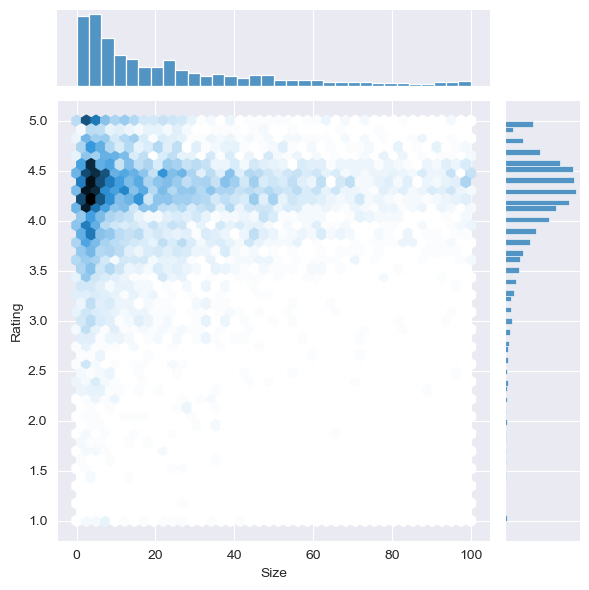

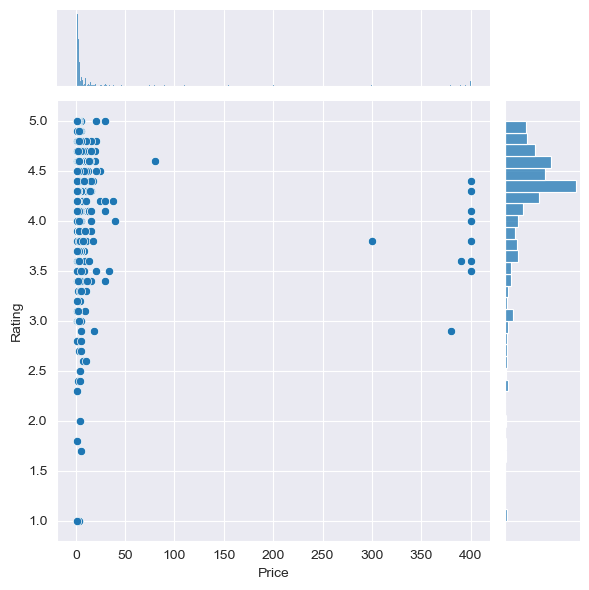

In [5]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Subset for categories with at least 250 apps
large_categories = apps.groupby(apps['Category']).filter(lambda x: len(x) >= 250).reset_index()

# Size vs. rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'], kind = 'hex')

# Subset out apps whose type is 'Paid'
paid_apps = apps[apps['Type'] == 'Paid']

# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

We can see that the majority of good rated apps (rating over 4) range from 2 MB to 20 MB. We also find that the vast majority of apps price themselves under $10.

### App category vs. price

The hardest but most important part for developers is how to price an app right.If the price is too high you might see a drastic decrease in sales.If the price is too low you might not make enough profit, so how can we determine what the right pricing is for an app? Let's look at some stats!

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


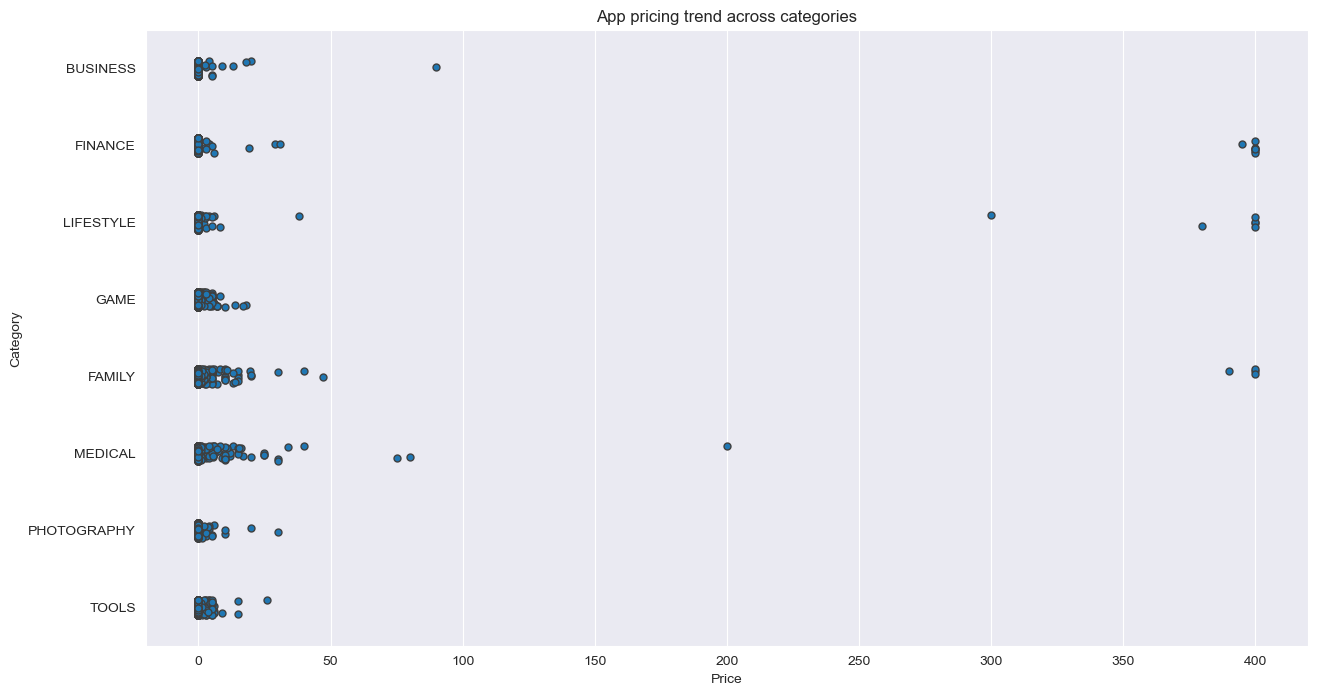

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Apps whose Price is greater than 200
apps_above_200 = popular_app_cats[['Category', 'App', 'Price']][popular_app_cats['Price'] > 200]
apps_above_200

### Filter out some junk

It looks like a bunch of the really expensive apps are "junk" apps. That is, apps that don't really have a purpose. Some app developer may create an app called I Am Rich Premium or most expensive app (H) just for a joke or to test their app development skills. 

Let's filter out these junk apps and re-do our visualization. The distribution of apps under $20 becomes clearer.

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

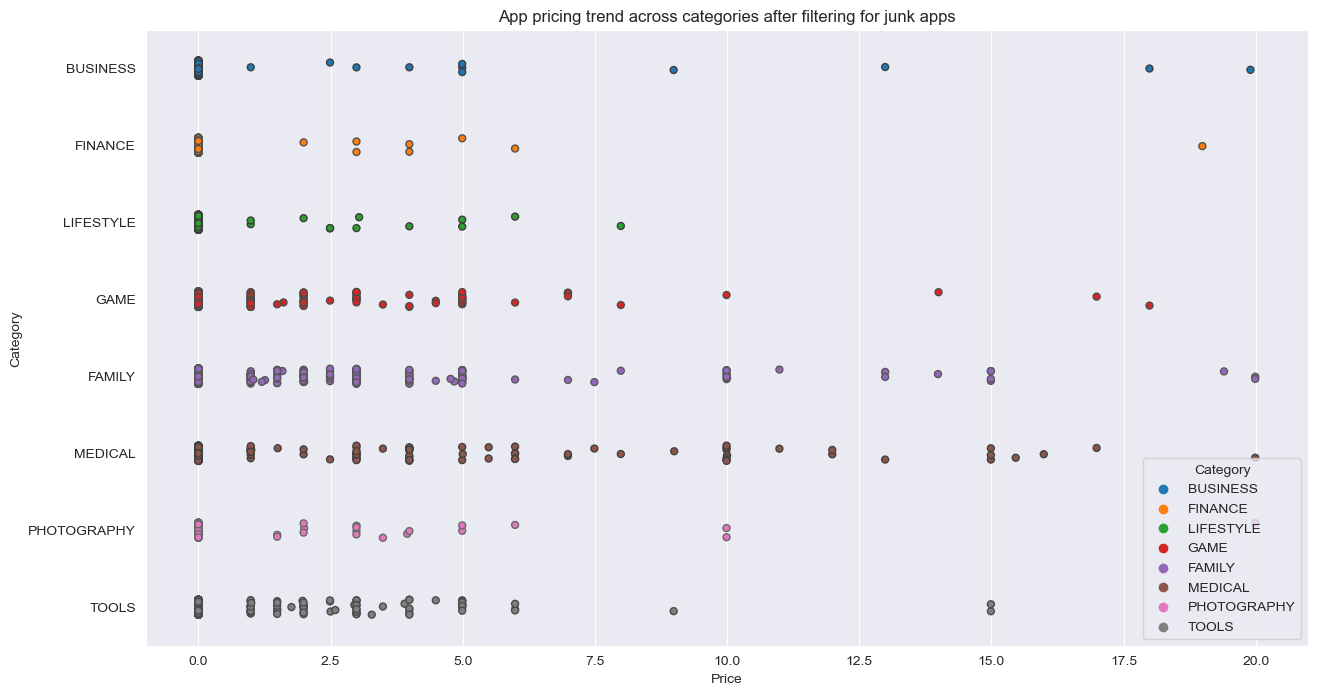

In [7]:
# Select apps priced below $100
apps_under_20 = popular_app_cats[popular_app_cats['Price'] < 20]


fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps
ax = sns.stripplot(x=apps_under_20['Price'], y=popular_app_cats['Category'], data=apps_under_20,
                   jitter=True, linewidth=1, hue='Category', palette='tab10', dodge= False)
ax.set_title('App pricing trend across categories after filtering for junk apps')

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

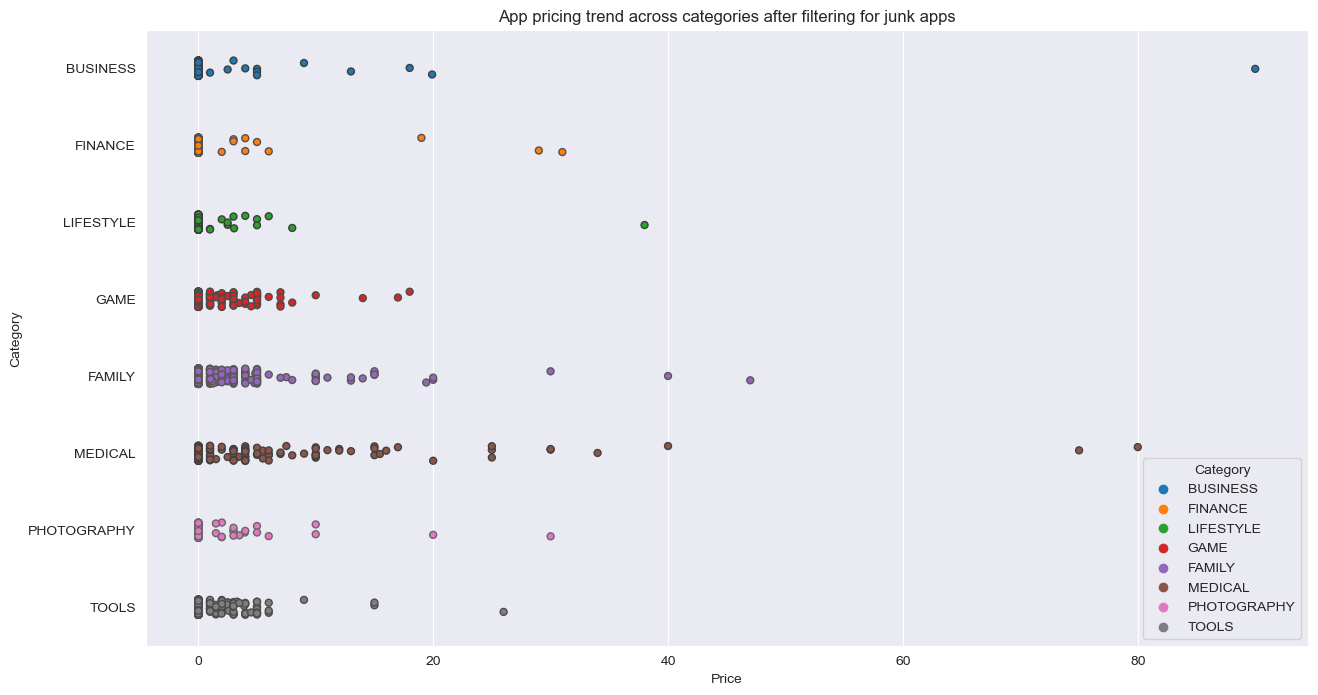

In [8]:
# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats['Price'] < 100]


fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps
ax = sns.stripplot(x=apps_under_100['Price'], y=popular_app_cats['Category'], data=apps_under_100,
                   jitter=True, linewidth=1, hue='Category', palette='tab10', dodge=False)
ax.set_title('App pricing trend across categories after filtering for junk apps')

### Distributions of paid vs. free

Let's take a quick look at the distributions of paid vs. free apps.

In [9]:
trace0 = go.Box(
    # Data for paid apps
    y=apps['Installs'][apps['Type']=='Paid'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y=apps['Installs'][apps['Type']=='Free'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(
        type = 'log',
        autorange = True
    )
)

# Add trace0 and trace1 to a list for plotting
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})